In [1]:
import matplotlib.pyplot as plt
import timeit
from math import sqrt

In [2]:
gap = 2

keyboard = {
    "q" : [0, 0], # first letter on first line
    "w" : [0, 1], # second letter on first line 
    "e" : [0, 2], # ...
    "r" : [0, 3],
    "t" : [0, 4],
    "y" : [0, 5],
    "u" : [0, 6],
    "i" : [0, 7],
    "o" : [0, 8],
    "p" : [0, 9],
    "a" : [1, 0], # first letter on second line
    "s" : [1, 1], # second letter on second line
    "d" : [1, 2], # ...
    "f" : [1, 3],
    "g" : [1, 4],
    "h" : [1, 5],
    "j" : [1, 6],
    "k" : [1, 7],
    "l" : [1, 8],
    "z" : [2, 0], # first letter on third line
    "x" : [2, 1], # second letter on third line
    "c" : [2, 2], # ...
    "v" : [2, 3],
    "b" : [2, 4],
    "n" : [2, 5],
    "m" : [2, 6]
}
    


In [3]:
def getMismatch(letterA, letterB):
    if letterA == letterB:
        return 0
    else:
        # return euclidian distance between letters on keyboard
        p1 = keyboard[letterA]
        p2 = keyboard[letterB]
        return sqrt( ((p1[0]-p2[0])**2)+((p1[1]-p2[1])**2) )

In [4]:
def editDistance(str1, str2, m , n): 

    if m==0: 
         return n*gap 

    if n==0: 
        return m*gap 
  
    return  min(
                   gap + editDistance(str1, str2, m, n-1),    
                   gap + editDistance(str1, str2, m-1, n),    
                   getMismatch(str1[m-1], str2[n-1]) + editDistance(str1, str2, m-1, n-1)   
                ) 


In [5]:
def editDistanceDP(str1, str2, m, n): 
    table = [[0 for j in range(n+1)] for i in range(m+1)] 
    
    for i in range(m+1):
        table[i][0] = gap*i
    
    for j in range(n+1):
        table[0][j] = gap*j

    for i in range(1,m+1): 
        for j in range(1,n+1): 
  
            table[i][j] = min(
                                gap + table[i][j-1],         
                                gap + table[i-1][j],            
                                getMismatch(str1[m-1], str2[n-1]) + table[i-1][j-1]   
                             )
    return table[m][n] 


In [6]:
str11 = "yes"
str12 = "yeah"
str21 = "sunday"
str22 = "saturday"
str31 = "technique" 
str32 = "echnequie"
str41 = "adventurer" 
str42 = "adgenturer"


In [7]:
def wrapper(func, *args, **kwargs):
    def wrapped():
        return func(*args, **kwargs)
    return wrapped

In [17]:
timeED = []
timeEDDP = []
timeED.append(0)
timeEDDP.append(0)

wrapped = wrapper(editDistance, str11, str12, len(str11), len(str12))
wrappedDP = wrapper(editDistanceDP, str11, str12, len(str11), len(str12))
timeED.append(timeit.timeit(wrapped, number = 10))
timeEDDP.append(timeit.timeit(wrappedDP, number = 10)) 

wrapped = wrapper(editDistance, str21, str22, len(str21), len(str22))
wrappedDP = wrapper(editDistanceDP, str21, str22, len(str21), len(str22))
timeED.append(timeit.timeit(wrapped, number = 10))
timeEDDP.append(timeit.timeit(wrappedDP, number = 10)) 

wrapped = wrapper(editDistance, str31, str32, len(str31), len(str32))
wrappedDP = wrapper(editDistanceDP, str31, str32, len(str31), len(str32))
timeED.append(timeit.timeit(wrapped, number = 10))
timeEDDP.append(timeit.timeit(wrappedDP, number = 10)) 

# timeED.append(timeit.timeit(editDistance(str41, str42, len(str41), len(str42))))
# timeEDDP.append(timeit.timeit(editDistanceDP(str41, str42, len(str41), len(str42))))

In [18]:
print(timeED)
print(timeEDDP)

[0, 0.0013756710013694828, 0.28589800099871354, 9.407473692001076]
[0, 0.0003913239997928031, 0.000334151000060956, 0.0005316399983712472]


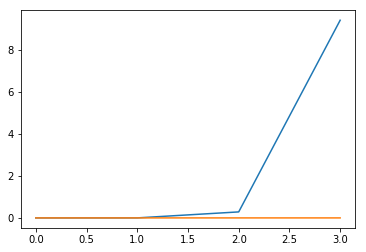

In [19]:
x = [0, 1, 2, 3]
plt.plot(x, timeED, x, timeEDDP)
plt.show()